In [1]:
'''
CTA200H Computing in Astrophysics
Professor: Norman Murray
TA: Fergus Horrobin
Assignment 2
@author: Patrick Horlaville
May 7th, 2022
'''

'\nCTA200H Computing in Astrophysics\nProfessor: Norman Murray\nTA: Fergus Horrobin\nAssignment 2\n@author: Patrick Horlaville\nMay 7th, 2022\n'

## Making the function for Newton's method

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def f(x):
    '''
    Computes the output of a specified array x input into a specified function f(x) = x**3 - x**2 - 1 
    
    Parameters
    ----------
    
    x : array_like
        values to be input into the function f
        
    Returns
    -------
    
    f(x) : array_like
           output values of x input into f
    '''
    
    
    return (x**3) - (x**2) - 1

In [4]:
def df(x):
    '''
    Computes the output of a specified array x input into a specified function df(x) = (3*(x**2)) - (2*x) 
    
    Parameters
    ----------
    
    x : array_like
        values to be input into the function f
        
    Returns
    -------
    
    df(x) : array_like
           output values of x input into df
           
           
    Notes 
    -----
    
    This specific function df() corresponds to the derivative function of f() specified above.
    
    '''
    
    return (3*(x**2)) - (2*x)

In [5]:
def newton(f, df, x0, max_iter, epsilon):
    
    '''
    Uses Newton's method root-finding algorithm over a number of specified iterations on a specified function. 
    The root is detected once the value of |f(x_n)| is sufficiently close to zero; x_n is then taken to be the root.
    The iteration stops if a root is found. 

    
    Parameters  
    ----------
    
    f : function
        analytical expression over which we want to find the root
         
    df : function
        analytical expression of the derivative of f
        
    x0 : float
        value where the iteration of the Newton method starts
    
    max_iter : integer
        number of iterations performed using the Newton method
    
    epsilon : float
        threshold of acceptance for |f(x_n)| below which x_n is taken to be a root 
        
        
    Returns
    -------
    
    If the root is found : 
        x_n: float
        the value of the root along with a printed statement
        
    If no root is found : 
        None 
        along with a printed statement
    
    '''
    
    x = np.zeros(max_iter+1)
    x[0] = x0
    
    for n in range(max_iter):
        
        x[n+1] = x[n] - (f(x[n]))/(df(x[n]))
        
        if np.absolute(f(x[n])) < epsilon:
            print("Found root in", n, "iterations")
            return x[n]
            break
            
    if np.absolute(f(x[-1])) >= epsilon:
        print("Iteration failed")
        return None
        
    else:
        print("Found root in", max_iter, "iterations, just at my limit! Phew!")
        return x[-1]

We pick max_iter to be 30, epsilon to be 1e-06 and we liberally choose x0 to be 0.1

In [6]:
newton(f, df, 0.1, 30, 1e-06)

Found root in 11 iterations


1.4655713154475905

## Checking that the result makes sense

Found root in 11 iterations


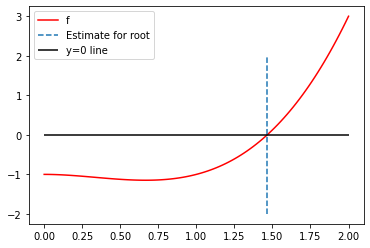

In [7]:
x_test = np.linspace(0, 2, 100, 1e-06)
y_test = f(x_test)

plt.plot(x_test, y_test, 'r', label = 'f')
plt.vlines(x = newton(f, df, 0.1, 30, 1e-06), ymin = -2, ymax = 2, linestyle = '--', label = 'Estimate for root')
plt.hlines(y = 0, xmin = 0, xmax = 2, color = 'k', label = 'y=0 line')
plt.legend()

Looks pretty good! The function newton() seems to have accurately found the root of f

## Experimenting

First, let's try to see what happens when we change the chosen value of x_0

Take x0 = -100, -10, 10, 100

In [8]:
newton(f, df, -100, 30, 1e-06)

Found root in 20 iterations


1.465571231890084

In [9]:
newton(f, df, -10, 30, 1e-06)

Found root in 26 iterations


1.4655712376690906

In [10]:
newton(f, df, 10, 30, 1e-06)

Found root in 9 iterations


1.465571232470246

In [11]:
newton(f, df, 100, 30, 1e-06)

Found root in 15 iterations


1.4655712318887797

The function newton() still seems to be able to pick up the root starting from those ends

Then, let's try to see what happens when we change the value of epsilon to 1e-8:

From part 2):

In [12]:
newton(f, df, 0.1, 30, 1e-08)

Found root in 12 iterations


1.4655712318767748

It only required one more iteration!

From part 3): 

In [13]:
newton(f, df, -100, 30, 1e-08)

Found root in 20 iterations


1.465571231890084

Same number

In [14]:
newton(f, df, -10, 30, 1e-08)

Found root in 27 iterations


1.465571231876768

One more

In [15]:
newton(f, df, 10, 30, 1e-08)

Found root in 9 iterations


1.465571232470246

Same 

In [16]:
newton(f, df, 100, 30, 1e-08)

Found root in 15 iterations


1.4655712318887797

Same

Overall, it seems like the newton() function is able to catch up increasingly precise roots of f with marginally few additional steps. 

In [17]:
pwd

'/fs/lustre/scratch/horlaville/CTA200_2022/CTA200H/lecture_4_numerical_python'